In [1]:
import jieba

In [2]:
from jieba import posseg

# POS => Part of Speech(名词，动词)

In [3]:
text = """
央视网消息（新闻联播）：中共中央总书记、国家主席、中央军委主席习近平4日给福建省寿宁县下党乡的乡亲们回信，祝贺他们实现了脱贫，鼓励他们发扬滴水穿石精神，走好乡村振兴之路。

习近平在回信中说，得知下党实现了脱贫，乡亲们的日子越过越红火，我非常高兴。向大家致以衷心的祝贺！

习近平表示，“车岭车上天，九岭爬九年”。当年“三进下党”的场景，我至今还历历在目。经过30年的不懈奋斗，下党天堑变通途、旧貌换新颜，乡亲们有了越来越多的幸福感、获得感，这生动印证了弱鸟先飞、滴水穿石的道理。


"""

# 

In [4]:
for w in posseg.cut(text):
    print(w)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/4q/wn42vfys16n4b3yz7rsj8hw00000gn/T/jieba.cache



/x


Loading model cost 0.918 seconds.
Prefix dict has been built succesfully.


央视网/nt
消息/n
（/x
新闻联播/nz
）/x
：/x
中共中央/nt
总书记/n
、/x
国家/n
主席/n
、/x
中央军委/nt
主席/n
习近平/nrfg
4/m
日/m
给/p
福建省/ns
寿宁县/ns
下/f
党/n
乡/n
的/uj
乡亲们/n
回信/v
，/x
祝贺/nr
他们/r
实现/v
了/ul
脱贫/v
，/x
鼓励/v
他们/r
发扬/v
滴水穿石/i
精神/n
，/x
走/v
好/a
乡村/n
振兴/v
之/u
路/n
。/x

/x

/x
习近平/nrfg
在/p
回信/v
中/f
说/v
，/x
得知/v
下党/n
实现/v
了/ul
脱贫/v
，/x
乡亲们/n
的/uj
日子/n
越过/d
越/d
红火/n
，/x
我/r
非常高兴/b
。/x
向/p
大家/n
致以/v
衷心/n
的/uj
祝贺/nr
！/x

/x

/x
习近平/nrfg
表示/v
，/x
“/x
车岭/ns
车上/s
天/q
，/x
九岭/ns
爬/v
九年/t
”/x
。/x
当年/t
“/x
三进/nz
下党/n
”/x
的/uj
场景/n
，/x
我/r
至今/d
还/d
历历在目/i
。/x
经过/p
30/m
年/m
的/uj
不懈/a
奋斗/v
，/x
下党/n
天堑/n
变通途/n
、/x
旧貌换新颜/i
，/x
乡亲们/n
有/v
了/ul
越来越/d
多/m
的/uj
幸福感/nr
、/x
获得/v
感/v
，/x
这/r
生动/vn
印证/j
了/ul
弱/a
鸟/n
先/d
飞/v
、/x
滴水穿石/i
的/uj
道理/n
。/x

/x

/x

/x


# Define a function .Input is word.output is some similar words

In [5]:
!ls

Applications
Desktop
Documents
Downloads
Lecture-03-Dynamic-Programming-Pre-Course_me.ipynb
Lecture-04.ipynb
Lesson-02.ipynb
Library
Movies
Music
Pictures
Public
PycharmProjects
changedfiles.txt
class1.ipynb
class2.ipynb
class3.ipynb
doxygen
get-pip.py
nltk_data
project1.ipynb
pythonclass1.ipynb
recurrentshop
未命名.ipynb


In [6]:
cut_file = open('/Users/henry/Documents/study/学习/nlp/nlp/article_9k_cut.txt','w')

In [5]:
def cut(string):return ' '.join(jieba.cut(string))

In [6]:
cut('这是一个测试')

'这是 一个 测试'

In [9]:
line_number = 5000
for i,line in enumerate(open('/Users/henry/Documents/study/学习/nlp/nlp/article_9k.txt')):
    if i % 100 == 0:print(i)
    cut_file.write(cut(line) + '\n')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


KeyboardInterrupt: 

In [ ]:
from gensim.models import Word2Vec

In [ ]:
from gensim.models.word2vec import LineSentence
import multiprocessing

In [ ]:
new_word2vec = Word2Vec(LineSentence('/Users/henry/Documents/study/学习/nlp/nlp/article_9k_cut.txt'), size=35, workers=multiprocessing.cpu_count())

In [ ]:
new_word2vec.wv.most_similar(['葡萄牙'], topn=20)

In [ ]:
new_word2vec.wv.most_similar(['捷克'], topn=20)

In [ ]:
from collections import defaultdict

In [ ]:
def get_related_words(initial_words, model):
    """
    @initial_words are initial words we already know
    @model is the word2vec model
    """
    
    unseen = initial_words
    
    seen = defaultdict(int)
    
    max_size = 500  # could be greater
    
    while unseen and len(seen) < max_size:
        if len(seen) % 50 == 0: 
            print('seen length : {}'.format(len(seen)))
            
        node = unseen.pop(0)
        
        new_expanding = [w for w, s in model.most_similar(node, topn=20)]
        
        unseen += new_expanding
        
        seen[node] += 1
        
        # optimal: 1. score function could be revised
        # optimal: 2. using dymanic programming to reduce computing time
    
    return seen

In [ ]:
len(new_word2vec.wv.vocab)

In [ ]:
related_words = get_related_words(['说', '表示'], new_word2vec)

In [ ]:
sorted(related_words.items(), key=lambda x: x[1], reverse=True)

In [94]:
 
news_content = []
for i,line in enumerate(open('/Users/henry/Documents/study/学习/nlp/nlp/article_9k_cut.txt')):
     #if i % 100 == 0:print(i)
    tmp = cut(line) 
    #print(tmp)
    #print('.-----------------')
    tmp = tmp.replace('\n', '', 3)
    if len(tmp)>0:
        news_content.append(tmp)
print('over')
    
    

over


In [95]:
news_content

['此外   自   本周   6   月   12   日起   除   小米   手机   6   等   15   款   机型   外   其余   机型   已   暂停   更新   发布   含   开发   版   体验版   内测   稳定版   暂不受   影响   以   确保   工程师   可以   集中   全部   精力   进行   系统优化   工作   有人   猜测   这   也   是   将   精力   主要   用到   MIUI9   的   研发   之中   MIUI8   去年   5   月   发布   距今已有   一年   有余   也   是   时候   更新换代   了   当然   关于   MIUI9   的   确切   信息   我们   还是   等待   官方消息   ',
 '骁龙   835   作为   唯一   通过   Windows10   桌面   平台   认证   的   ARM   处理器   高通   强调   不会   因为   只   考虑   性能   而   去   屏蔽掉   小   核心   相反   他们   正   联手   微软   找到   一种   适合   桌面   平台   的   兼顾   性能   和   功耗   的   完美   方案   报道   称   微软   已经   拿到   了   一些   新   的   源码   以便   Windows10   更好   地   理解   biglittle   架构   资料   显示   骁龙   835   作为   一款   集成   了   CPUGPU   基带   蓝牙   WiFi   的   SoC   比   传统   的   Wintel   方案   可以   节省   至少   30   的   PCB   空间   按计划   今年   Q4   华硕   惠普   联想   将   首发   骁龙   835Win10   电脑   预计   均   是   二合一   形态   的   产品   当然   高通   骁龙   只是   个   开始   未来   也许   还   能   见到   三星   Exynos   联发科   华为   

# TFIDF Key words

In [11]:
def document_frequency(word): 
    return sum(1 for n in news_content if word in n)

In [12]:
document_frequency('的')

41888

In [13]:
import math

In [14]:
def idf(word):
    """Gets the inversed document frequency"""
    return math.log10(len(news_content) / document_frequency(word))

In [25]:
def tf(word, document):
    """
    Gets the term frequemcy of a @word in a @document.
    """
    words = document.split()
    
    return sum(1 for w in words if w == word) #/len(words)

In [26]:
def get_keywords_of_a_ducment(document):
    #获得文本向量
    words = set(document.split())
    
    tfidf = [
        (w, tf(w, document) * idf(w)) for w in words
    ]
    
    tfidf = sorted(tfidf, key=lambda x: x[1], reverse=True)
    
    return tfidf

In [28]:
machine_new_keywords = get_keywords_of_a_ducment(news_content[100])
machine_new_keywords

[('处理器', 7.667459049183574),
 ('EPYC', 7.1116393661223825),
 ('内存', 5.1116393661223825),
 ('性能', 4.3157593487783075),
 ('最高', 4.015007216541855),
 ('幅度', 3.5998896547773995),
 ('EPYC7601', 3.5558196830611912),
 ('IntelXeon', 3.5558196830611912),
 ('PCIE308', 3.5558196830611912),
 ('SPEC2006', 3.5558196830611912),
 ('2TB', 3.5558196830611912),
 ('DDR4', 3.5558196830611912),
 ('领先', 3.472551495038645),
 ('AMD', 3.25478968739721),
 ('同等', 2.7107216430469343),
 ('端的', 2.5144269979029663),
 ('支持', 2.3844154063380936),
 ('起步', 2.325370761682917),
 ('128', 2.25478968739721),
 ('定位', 1.8930618513796171),
 ('测试', 1.874578445685604),
 ('通道', 1.8234259232382226),
 ('47', 1.6064296764162784),
 ('的话', 1.5690479487949462),
 ('比较', 1.3599200306519574),
 ('的', 1.2882492803827226),
 ('达到', 1.2017112439137903),
 ('根据', 1.0588900349879762),
 ('条', 0.9983124811555333),
 ('相', 0.5934503473911701),
 ('从', 0.5920318557156359),
 ('而', 0.5826918294614926),
 ('20', 0.5338039432434709),
 ('将', 0.4872627879888280

# Wordcloud

In [29]:
import wordcloud

In [30]:
wc = wordcloud.WordCloud('/Users/henry/Documents/study/学习/nlp/nlp/SourceHanSerifSC-Regular.otf')
# we could download the font from https://github.com/Computing-Intelligence/datasource

In [31]:
import matplotlib.pyplot as plt

In [32]:
%matplotlib inline

In [33]:
machine_new_keywords_dict = {w: score for w, score in machine_new_keywords}

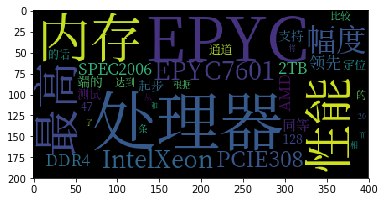

In [34]:
plt.imshow(wc.generate_from_frequencies(machine_new_keywords_dict))

In [39]:
shenzhen_social_news = get_keywords_of_a_ducment(news_content[4])
shenzhen_social_news

[('一加', 12.314793713366115),
 ('电池', 4.248911837804408),
 ('AMOLED', 3.5558196830611912),
 ('DashCharge', 3.5558196830611912),
 ('xx99', 3.5558196830611912),
 ('5V4A', 3.5558196830611912),
 ('279928992999', 3.5558196830611912),
 ('快充', 3.5558196830611912),
 ('3T', 3.5558196830611912),
 ('1080P', 3.5558196830611912),
 ('3400mAh', 3.5558196830611912),
 ('6G8GBRAM64GB128GBROM', 3.5558196830611912),
 ('刘作', 3.5558196830611912),
 ('备货', 3.25478968739721),
 ('轻薄', 3.0786984283415286),
 ('大屏', 2.9537596917332287),
 ('手机', 2.8318811933199095),
 ('显示屏', 2.7776684326775474),
 ('缩水', 2.7107216430469343),
 ('市面', 2.6527296960692475),
 ('规格', 2.5558196830611912),
 ('1600', 2.5558196830611912),
 ('某个', 2.5144269979029663),
 ('泄露', 2.37972842400551),
 ('旗舰', 2.351699700405266),
 ('三星', 2.351699700405266),
 ('所说', 2.1578796743891537),
 ('摄像头', 2.1578796743891537),
 ('搭载', 2.140846335090373),
 ('京东', 2.0786984283415286),
 ('售价', 2.050669704741285),
 ('惊喜', 2.050669704741285),
 ('寸', 2.0117516387109156)

In [40]:
from PIL import Image
import numpy as np

In [41]:
police_mask = np.array(Image.open('/Users/henry/Documents/study/学习/nlp/nlp/mask.jpg'))

In [42]:
wordcloud_with_mask = wordcloud.WordCloud('/Users/henry/Documents/study/学习/nlp/nlp/SourceHanSerifSC-Regular.otf',mask=police_mask)


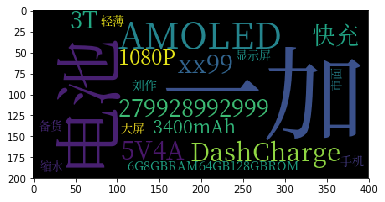

In [43]:
plt.imshow(wc.generate_from_frequencies({w:s for w, s in shenzhen_social_news[:20]}))

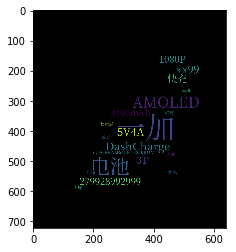

In [44]:
plt.imshow(wordcloud_with_mask.generate_from_frequencies({w:s for w, s in shenzhen_social_news[:20]}))

# TFIDF Vectorizezd

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [97]:
vectorized = TfidfVectorizer(max_features=10000)

In [98]:
sample_num = 50000
sub_samples = news_content[:sample_num]

In [99]:
X = vectorized.fit_transform(sub_samples)#返回的是非系数矩阵

In [100]:
X.shape

(1798, 10000)

In [101]:
X

<1798x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 253630 stored elements in Compressed Sparse Row format>

In [102]:
vectorized.vocabulary_

{'此外': 6277,
 '本周': 5935,
 '12': 30,
 '日起': 5659,
 '小米': 4069,
 '手机': 4904,
 '15': 44,
 '机型': 5981,
 '其余': 1930,
 '暂停': 5782,
 '更新': 5815,
 '发布': 2727,
 '开发': 4429,
 '影响': 4569,
 '确保': 7379,
 '工程师': 4206,
 '可以': 2833,
 '集中': 9634,
 '全部': 1831,
 '精力': 7699,
 '进行': 9145,
 '工作': 4190,
 '有人': 5864,
 '猜测': 6921,
 '主要': 1039,
 '研发': 7358,
 '之中': 1058,
 '去年': 2662,
 '一年': 420,
 '时候': 5682,
 '当然': 4547,
 '关于': 1903,
 '信息': 1615,
 '我们': 4843,
 '还是': 9084,
 '等待': 7633,
 '骁龙': 9878,
 '835': 213,
 '作为': 1521,
 '唯一': 3085,
 '通过': 9254,
 'windows10': 336,
 '桌面': 6171,
 '平台': 4308,
 '认证': 8533,
 '处理器': 3424,
 '高通': 9942,
 '强调': 4519,
 '不会': 684,
 '因为': 3172,
 '考虑': 8016,
 '性能': 4685,
 '核心': 6145,
 '相反': 7252,
 '他们': 1337,
 '联手': 8052,
 '微软': 4618,
 '找到': 4984,
 '一种': 465,
 '适合': 9200,
 '兼顾': 1948,
 '完美': 3868,
 '方案': 5573,
 '报道': 5051,
 '已经': 4227,
 '拿到': 5121,
 '一些': 353,
 '以便': 1358,
 '更好': 5811,
 '理解': 7013,
 '架构': 6093,
 '资料': 8778,
 '显示': 5749,
 '一款': 450,
 '集成': 9639,
 'wifi': 334,
 '传统': 1447,

In [103]:
np.where(X[0].toarray()) # get the positions which values are not zero

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([  30,   44,  420, 1039, 1058, 1615, 1831, 1903, 1930, 2662, 2727,
        2833, 4069, 4190, 4206, 4429, 4547, 4569, 4843, 4904, 5659, 5682,
        5782, 5815, 5864, 5935, 5981, 6277, 6921, 7358, 7379, 7633, 7699,
        9084, 9145, 9634]))

In [104]:
news_content[0]

'此外   自   本周   6   月   12   日起   除   小米   手机   6   等   15   款   机型   外   其余   机型   已   暂停   更新   发布   含   开发   版   体验版   内测   稳定版   暂不受   影响   以   确保   工程师   可以   集中   全部   精力   进行   系统优化   工作   有人   猜测   这   也   是   将   精力   主要   用到   MIUI9   的   研发   之中   MIUI8   去年   5   月   发布   距今已有   一年   有余   也   是   时候   更新换代   了   当然   关于   MIUI9   的   确切   信息   我们   还是   等待   官方消息   '

In [105]:
vectorized.vocabulary_

{'此外': 6277,
 '本周': 5935,
 '12': 30,
 '日起': 5659,
 '小米': 4069,
 '手机': 4904,
 '15': 44,
 '机型': 5981,
 '其余': 1930,
 '暂停': 5782,
 '更新': 5815,
 '发布': 2727,
 '开发': 4429,
 '影响': 4569,
 '确保': 7379,
 '工程师': 4206,
 '可以': 2833,
 '集中': 9634,
 '全部': 1831,
 '精力': 7699,
 '进行': 9145,
 '工作': 4190,
 '有人': 5864,
 '猜测': 6921,
 '主要': 1039,
 '研发': 7358,
 '之中': 1058,
 '去年': 2662,
 '一年': 420,
 '时候': 5682,
 '当然': 4547,
 '关于': 1903,
 '信息': 1615,
 '我们': 4843,
 '还是': 9084,
 '等待': 7633,
 '骁龙': 9878,
 '835': 213,
 '作为': 1521,
 '唯一': 3085,
 '通过': 9254,
 'windows10': 336,
 '桌面': 6171,
 '平台': 4308,
 '认证': 8533,
 '处理器': 3424,
 '高通': 9942,
 '强调': 4519,
 '不会': 684,
 '因为': 3172,
 '考虑': 8016,
 '性能': 4685,
 '核心': 6145,
 '相反': 7252,
 '他们': 1337,
 '联手': 8052,
 '微软': 4618,
 '找到': 4984,
 '一种': 465,
 '适合': 9200,
 '兼顾': 1948,
 '完美': 3868,
 '方案': 5573,
 '报道': 5051,
 '已经': 4227,
 '拿到': 5121,
 '一些': 353,
 '以便': 1358,
 '更好': 5811,
 '理解': 7013,
 '架构': 6093,
 '资料': 8778,
 '显示': 5749,
 '一款': 450,
 '集成': 9639,
 'wifi': 334,
 '传统': 1447,

In [106]:
import random

In [107]:
document_id_1, document_id_2 = random.randint(0, 1000), random.randint(0, 1000)

In [108]:
document_id_2

843

In [109]:
document_id_1

487

In [110]:
news_content[document_id_1]

'德国   1   球小胜   澳大利亚   北京   时间   6   月   19   日晚   23002017   年   俄罗斯   联合会杯   小组赛   第   1   轮   德国   对阵   澳大利亚   上半场   布兰特   助攻   施   廷德尔   打破   僵局   罗基奇   为   澳大利亚   扳平   比分   德   拉克斯   勒   点球   帮助   德国队   重新   领先   下半场   基米   希   助攻   格雷茨   卡   破门   尤里   奇   补射   再   追   一分   最终   全场   比赛   结束   德国   32   力克   澳大利亚   随着   主裁判   一声   长哨   比赛   正式   开始   第   6   分钟   布兰特   右路   带球   突破   到底   线处   选择   倒三角   回传   施   廷德尔   跟进   左脚   射门   球进   了   10   德国   取得   领先   第   16   分钟   德国   获得   前场   左路   定位球   机会   德   拉克斯   勒   一脚   开   到   禁区   格雷茨   卡   甩头   攻门   稍稍   偏出   1   分钟   后   格雷茨   卡右   路传中   瓦格纳   头球   攻门   顶   偏   了   第   18   分钟   德国队   左侧   角球   开   到   禁区   被   解围   鲁迪   外围   得球   远射   打高   第   22   分钟   布兰特   带球   突入   禁区   在   滑倒   之后   迅速   起身   一个   扣球   之后   小   角度   射门   皮球   被   门将   扑   出   底线   第   24   分钟   格雷茨   卡   前场   送 出   挑传   瓦格纳   跟进   射门   偏出   第   25   分钟   基米   希挑   传送   到   禁区   格雷茨   卡   头球   攻门   被   扑   出   第   28   分钟   德国   开出   角球   布兰特   外围   

In [111]:
news_content[document_id_2]

'原   标题   女   租客   演佛   上身   骗   女房东   98   万元   20   岁   的   女   大仙   张某   上演   佛   上身   的   戏码   鼓动   他人   拿   钱   供佛   以   保平安   信以为真   的   女房东   不到   一年   时间   分   多次   给   了   女   大仙   98   万余元   幸亏   被   房东   的   女婿   发现   并   报警   因涉嫌   诈骗罪   张某   已   被   昆明市   官渡区   人民检察院   批准逮捕   这个   大仙   张某   是   名   年   仅   20   岁   的   女子   2016   年   张   某到   昆明   租房   住   因此   结识   了   房东   梁   女士   在   平常   的   交流   中张   某   发现   梁   女士   很   迷信   于是   张某   便动   起   了   邪念   谎称   自己   能佛   上身   还   表演   给   梁   女士   看   取得   梁   女士   的   信任   后张   某   要求   梁   女士   拿   钱   供佛   还   主动   提出   由   她   替梁   女士   去   外地   供佛   消灾   以保   家人   平安   事业   顺利   梁   女士   信以为真   陆续   交给   张某   不少   供佛   费用   突然   有   一天   张某   掐指   算   过后   称梁   女士   一家   即将   有   血光之灾   家人   可能   会   发生   车祸   要   想   挡   灾   转运   就要   虔诚   供佛   之后   梁   女士   又   陆续   给   了   张   某   不少   供佛   钱   从   2016   年   年   中   至   2017   年   3   月初   梁   女士   分   9   次   给   了   张   某   9872   万元   的   供佛   费用   梁   女士 

In [113]:
vector_of_d_1 = X[document_id_1].toarray()[0]
vector_of_d_1

array([0., 0., 0., ..., 0., 0., 0.])

In [114]:
X[document_id_1]

<1x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 127 stored elements in Compressed Sparse Row format>

In [75]:
vector_of_d_2 = X[document_id_2].toarray()[0]

In [115]:
random_choose = random.randint(0, 1000)

In [116]:
random_choose

445

In [117]:
news_content[random_choose]

'新华社   贵阳   ６   月   ２   ３   日电   记者   李黔   渝   贵州省政府   近日   下发   通知   对   严重   影响   公共安全   的   中学   医院   大型超市   酒店   等   ２   ６   家   重大   火灾   隐患   单位   实施   政府   挂牌   督办   整改   记者   了解   到   这些   重大   火灾   隐患   单位   中   包括   遵义市   第二   人民   医院   习水县   中医院   等   ６   家   医院   湄潭县   湄潭   中学   北京   华联   安顺   分公司   余庆县   皇潮   酒店   以及   一些   大型   小区   物业   房地产   公司   的   楼群   等   这些   重大   火灾   隐患   单位   存在   的   主要   问题   是   消防   灭火   设备   自动警报   自动   喷水   灭火   系统   等   功能   不能   正常   运行   使用   消防车   登高   操作   场地   被   占用   疏散   通道   系统   不能   通往   室外   等   按照   整改   要求   这些   隐患   单位   必须   在   今年   １   ２   月   上旬   完成   整改   相关   部门   定期   通报   各地   整改   进度   对   责任   不   落实   督办   不力   失职   渎职   导致   重大   火灾   隐患   久   推不动   久拖   不改   以及   由此   造成   火灾事故   的   将   依法追究   责任   '

In [118]:
from scipy.spatial.distance import cosine

In [119]:
def distance(v1, v2): return cosine(v1, v2)

In [120]:
distance([1, 1], [2, 2])

0.0

In [121]:
distance(X[random_choose].toarray()[0], X[document_id_1].toarray()[0])

0.9986257386422907

In [122]:
distance(X[random_choose].toarray()[0], X[document_id_2].toarray()[0])

0.9991260314576055

In [123]:
sorted(list(range(1000)), key=lambda i: distance(X[random_choose].toarray()[0], 
                                      X[i].toarray()[0]))

[445,
 27,
 765,
 53,
 73,
 41,
 69,
 32,
 61,
 86,
 26,
 112,
 85,
 14,
 125,
 25,
 58,
 60,
 31,
 56,
 3,
 39,
 79,
 94,
 65,
 16,
 30,
 48,
 120,
 55,
 80,
 99,
 8,
 52,
 51,
 62,
 75,
 21,
 113,
 67,
 93,
 71,
 7,
 17,
 110,
 74,
 115,
 59,
 40,
 42,
 123,
 84,
 118,
 23,
 12,
 34,
 70,
 11,
 46,
 36,
 111,
 20,
 98,
 96,
 108,
 72,
 97,
 109,
 6,
 63,
 50,
 114,
 95,
 121,
 54,
 47,
 89,
 122,
 37,
 19,
 44,
 76,
 102,
 5,
 22,
 29,
 4,
 0,
 87,
 90,
 91,
 106,
 2,
 81,
 101,
 64,
 119,
 78,
 35,
 66,
 57,
 92,
 18,
 77,
 9,
 124,
 68,
 1,
 116,
 15,
 43,
 13,
 38,
 104,
 10,
 24,
 83,
 33,
 117,
 28,
 45,
 82,
 88,
 100,
 103,
 412,
 442,
 204,
 284,
 690,
 631,
 461,
 625,
 703,
 796,
 453,
 159,
 647,
 680,
 539,
 683,
 319,
 776,
 429,
 674,
 650,
 828,
 413,
 280,
 773,
 712,
 705,
 570,
 581,
 543,
 563,
 908,
 714,
 486,
 549,
 380,
 726,
 368,
 552,
 567,
 390,
 900,
 991,
 834,
 538,
 376,
 308,
 917,
 374,
 340,
 258,
 977,
 436,
 557,
 342,
 638,
 326,
 916,
 632,
 844,

In [92]:
bin(49 & 38)

'0b100000'